### Import Libraries

In [597]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [598]:
pd.options.display.max_rows=None
pd.options.display.max_columns=None

sns.set_style('darkgrid')

### Import data set

In [599]:
data=pd.read_csv('titanic_train.csv')
df=data.copy()
print(f'Shape of data : {df.shape}')

Shape of data : (891, 12)


In [600]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [601]:
for i in df.columns:
    print(f'{i} has {df[i].nunique()} categories')

PassengerId has 891 categories
Survived has 2 categories
Pclass has 3 categories
Name has 891 categories
Sex has 2 categories
Age has 88 categories
SibSp has 7 categories
Parch has 7 categories
Ticket has 681 categories
Fare has 248 categories
Cabin has 147 categories
Embarked has 3 categories


Categorical columns have too many categorical columns will be taken out of our data

In [602]:
df=df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [603]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


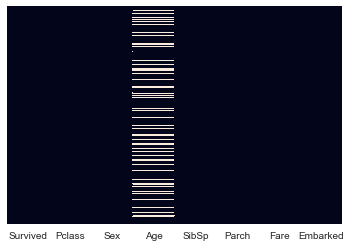

In [604]:
# checing for NAN values
sns.heatmap(df.isnull(), yticklabels=0, cbar=0)

In [605]:
# Age has significant amount of NaN values so we need to fill it with some values

In [606]:
df[df.Sex=='male'].Age.median()

29.0

In [607]:
df[df.Sex=='female'].Age.median()

27.0

We will fill the NaN values with median age of each gender

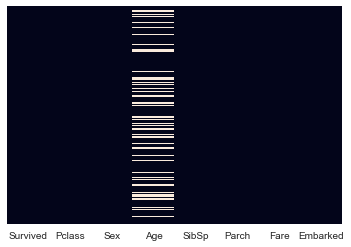

In [608]:
sns.heatmap(df[df.Sex=='male'].isnull(), yticklabels=0, cbar=0)

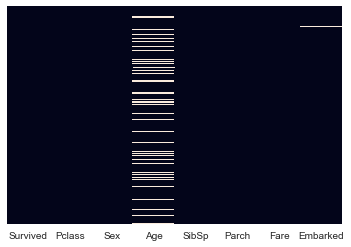

In [609]:
sns.heatmap(df[df.Sex=='female'].isnull(), yticklabels=0, cbar=0)

In [610]:
df[df.Sex=='male'].Age=df[df.Sex=='male'].Age.replace(np.nan, df[df.Sex=='male'].Age.median())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


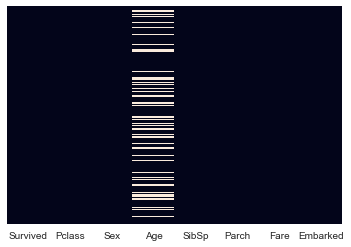

In [611]:
sns.heatmap(df[df.Sex=='male'].isnull(), yticklabels=0, cbar=0)

In [612]:
mal_med=df[df.Sex=='male'].Age.median()
femal_med=df[df.Sex=='female'].Age.median()

In [613]:
mal_med

29.0

In [614]:
femal_med

27.0

In [615]:
df['Age']=df.groupby('Sex').Age.transform(lambda x: x.fillna(x.median()))

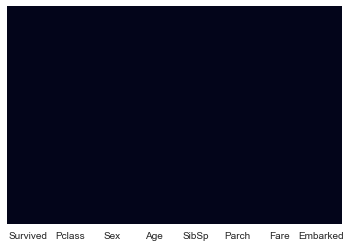

In [616]:
sns.heatmap(df.isnull(), yticklabels=0, cbar=0)

### Exploratory Data Analysis

In [617]:
cat_col=[x for x in df.columns if df[x].dtypes=='O']

In [618]:
df[cat_col].head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


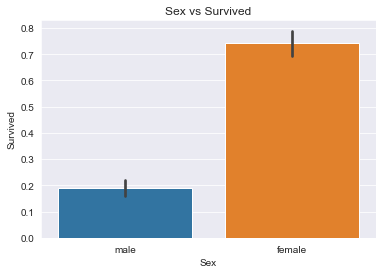

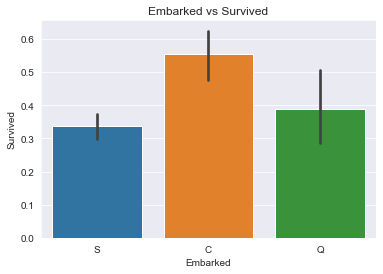

In [619]:
for i in cat_col:
    sns.barplot(x=df[i], y=df['Survived'])
    plt.title(f'{i} vs Survived')
    plt.show()

In [620]:
num_col=[x for x in df.columns if df[x].dtypes != 'O']
df[num_col].head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [621]:
disc_num_col=[x for x in num_col if df[x].nunique()<10]
df[disc_num_col].head()

,Survived,Pclass,SibSp,Parch
0,0,3,1,0
1,1,1,1,0
2,1,3,0,0
3,1,1,1,0
4,0,3,0,0


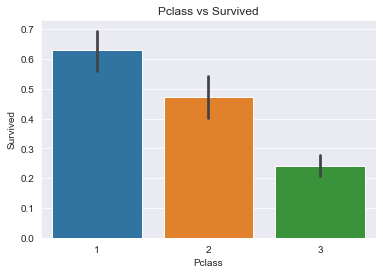

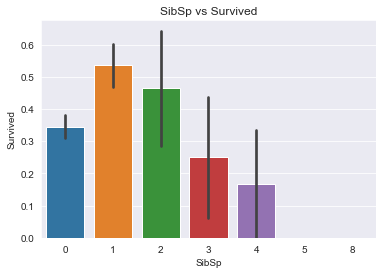

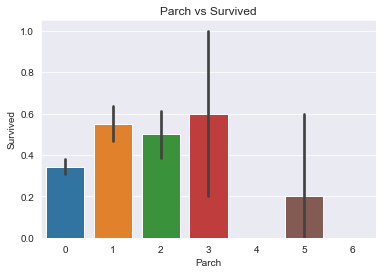

In [622]:
for i in disc_num_col:
    if i != 'Survived':
        sns.barplot(x=df[i], y=df['Survived'])
        plt.title(f'{i} vs Survived')
        plt.show()

In [623]:
cont_num_col=[x for x in num_col if x not in disc_num_col]

In [624]:
df[cont_num_col].head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


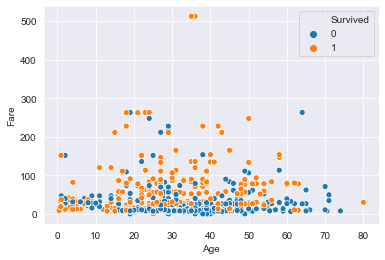

In [625]:
sns.scatterplot(x='Age', y='Fare', data=df, hue='Survived')

From above plot it's clear that our continuous data has outliers, fare beyond 300 and age beyond 70 is considered to be an outlier

### Outliers detection

AxesSubplot(0.125,0.125;0.775x0.755)


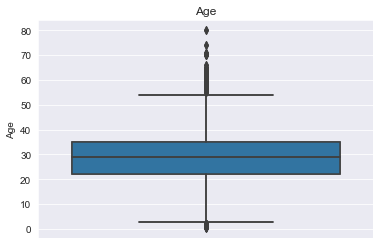

AxesSubplot(0.125,0.125;0.775x0.755)


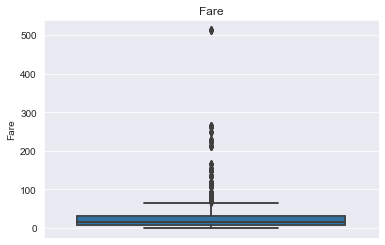

In [626]:
for i in cont_num_col:
    sns.boxplot(y=df[i])
    print(sns.boxplot(y=df[i]))
    plt.title(i)
    plt.show()

Both continuous data has outliers

Getting Outliers in Continuous Numerical variables

### Outliers Removal

In [627]:
from scipy import stats

In [628]:
z_scores=np.abs(stats.zscore(df[cont_num_col]))

In [629]:
z_scores

array([[0.571902  , 0.50244517],
       [0.65778516, 0.78684529],
       [0.26448021, 0.48885426],
       ...,
       [0.18762476, 0.17626324],
       [0.26448021, 0.04438104],
       [0.19665248, 0.49237783]])

In [630]:
filtered_data=(z_scores<3).all(axis=1)

In [631]:
df=df[filtered_data]

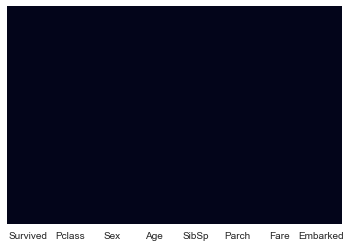

In [632]:
sns.heatmap(df.isnull(), yticklabels=0, cbar=0)

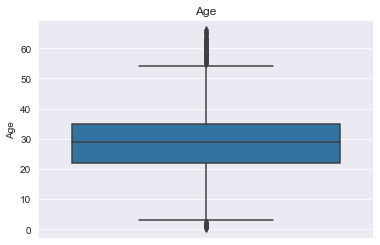

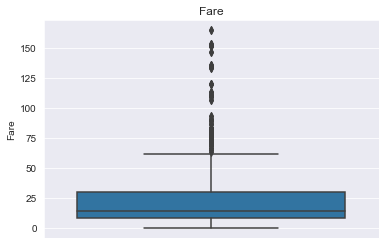

In [633]:
for i in ['Age', 'Fare']:
    sns.boxplot(y=df[i])
    plt.title(i)
    plt.show()

### Encoding categorical variables

In [634]:
df_enc=pd.get_dummies(df[cat_col], drop_first=True)

In [635]:
df_enc=df_enc.rename(columns={'Sex_male': 'Sex', 'Embarked_Q' : 'Q', 'Embarked_S' : 'S'})

In [636]:
df_enc

,Sex,Q,S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
5,1,1,0
6,1,0,1
7,1,0,1
8,0,0,1
9,0,0,0


In [637]:
df[num_col]

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.00,1,0,7.2500
1,1,1,38.00,1,0,71.2833
2,1,3,26.00,0,0,7.9250
3,1,1,35.00,1,0,53.1000
4,0,3,35.00,0,0,8.0500
5,0,3,29.00,0,0,8.4583
6,0,1,54.00,0,0,51.8625
7,0,3,2.00,3,1,21.0750
8,1,3,27.00,0,2,11.1333
9,1,2,14.00,1,0,30.0708


In [638]:
data=pd.concat([df_enc, df[num_col]], axis=1)

In [639]:
data.head()

,Sex,Q,S,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,1,0,3,22.0,1,0,7.2500
1,0,0,0,1,1,38.0,1,0,71.2833
2,0,0,1,1,3,26.0,0,0,7.9250
3,0,0,1,1,1,35.0,1,0,53.1000
4,1,0,1,0,3,35.0,0,0,8.0500


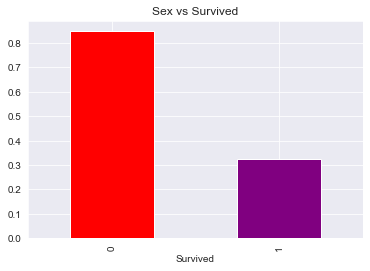

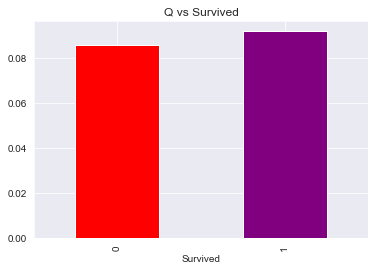

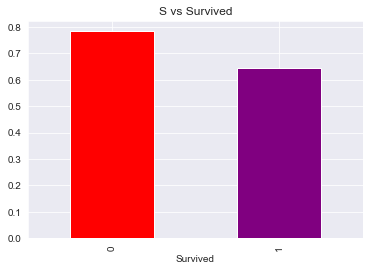

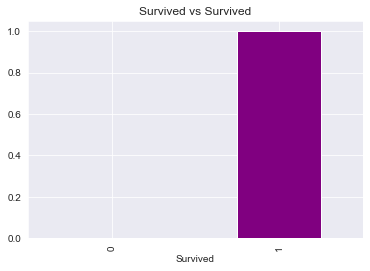

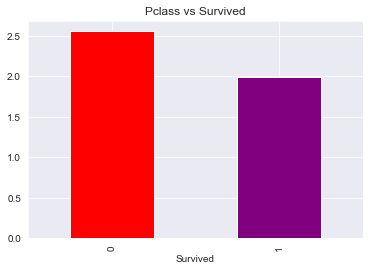

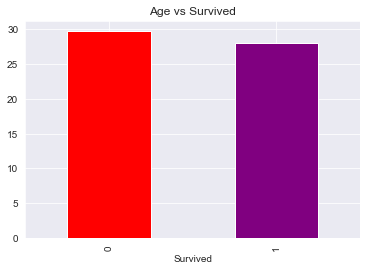

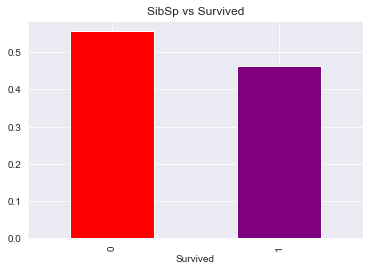

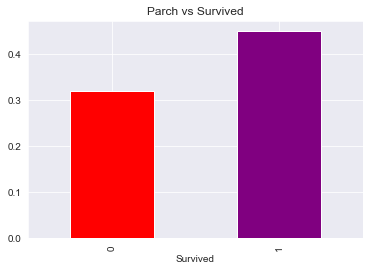

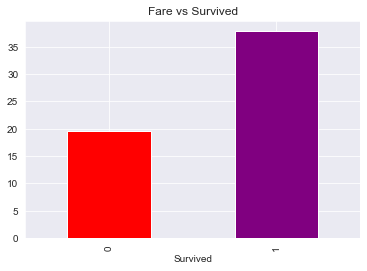

In [640]:
for i in data.columns:
    data.groupby('Survived')[i].mean().plot.bar(color=['red', 'purple'])
    plt.title(f'{i} vs Survived')
    plt.show()

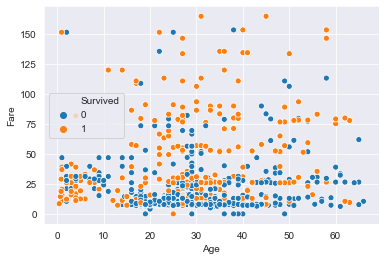

In [641]:
sns.scatterplot(x='Age', y='Fare', data=df, hue='Survived')

From above scatterplot it is clear that we dont have any outlier

In [642]:
data

,Sex,Q,S,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,1,0,3,22.00,1,0,7.2500
1,0,0,0,1,1,38.00,1,0,71.2833
2,0,0,1,1,3,26.00,0,0,7.9250
3,0,0,1,1,1,35.00,1,0,53.1000
4,1,0,1,0,3,35.00,0,0,8.0500
5,1,1,0,0,3,29.00,0,0,8.4583
6,1,0,1,0,1,54.00,0,0,51.8625
7,1,0,1,0,3,2.00,3,1,21.0750
8,0,0,1,1,3,27.00,0,2,11.1333
9,0,0,0,1,2,14.00,1,0,30.0708


Deviding data in independent and dependent variables

In [643]:
X=data.drop('Survived', axis=1)
Y=data['Survived']

### Splitting data in train test split

In [644]:
from sklearn.model_selection import train_test_split

In [645]:
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.2, random_state=42)

In [646]:
print(f'Shape of x_train : {x_train.shape}')
print(f'Shape of x_test : {x_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of x_train : (691, 8)
Shape of x_test : (173, 8)
Shape of y_train : (691,)
Shape of y_test : (173,)


### 1. Creating KNN Classifier

Scaling data for KNN algorithm

In [647]:
x_train

,Sex,Q,S,Pclass,Age,SibSp,Parch,Fare
667,1,0,1,3,29.00,0,0,7.7750
361,1,0,0,2,29.00,1,0,27.7208
621,1,0,1,1,42.00,1,0,52.5542
7,1,0,1,3,2.00,3,1,21.0750
457,0,0,1,1,27.00,1,0,51.8625
160,1,0,1,3,44.00,0,1,16.1000
547,1,0,0,2,29.00,0,0,13.8625
104,1,0,1,3,37.00,2,0,7.9250
456,1,0,1,1,65.00,0,0,26.5500
880,0,0,1,2,25.00,0,1,26.0000


In [648]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [649]:
x_train[['Age', 'Fare']]=sc.fit_transform(x_train[['Age', 'Fare']])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [650]:
x_test[['Age', 'Fare']]=sc.transform(x_test[['Age', 'Fare']])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [651]:
X_test=x_test.values
X_train=x_train.values

### Model creation

In [654]:
from sklearn.neighbors import KNeighborsClassifier

In [655]:
knn=KNeighborsClassifier(n_neighbors=1)

In [656]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Model Prediction

In [657]:
predict_train=knn.predict(x_train)
predict_test=knn.predict(x_test)

### Model Evaluation

#### 1. Train Data

In [658]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, jaccard_similarity_score

In [659]:
confusion_matrix(y_train, predict_train)

array([[431,   6],
       [ 10, 244]], dtype=int64)

In [660]:
print(classification_report(y_train, predict_train))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       437
           1       0.98      0.96      0.97       254

    accuracy                           0.98       691
   macro avg       0.98      0.97      0.98       691
weighted avg       0.98      0.98      0.98       691



In [661]:
jaccard_similarity_score(y_train, predict_train)

0.9768451519536903

#### 2. Test data

In [662]:
confusion_matrix(y_test, predict_test)

array([[81, 19],
       [22, 51]], dtype=int64)

In [663]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       100
           1       0.73      0.70      0.71        73

    accuracy                           0.76       173
   macro avg       0.76      0.75      0.76       173
weighted avg       0.76      0.76      0.76       173



In [664]:
jaccard_similarity_score(y_test, predict_test)

0.7630057803468208

## Parameter Tuning

In [785]:
error_rate=[]
for i in range(1,51):
    knn_i=KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(x_train, y_train)
    predict_i=knn_i.predict(x_test)
    error_rate.append(np.mean(np.array(y_test) != predict_i))

Text(0, 0.5, 'Error rate')

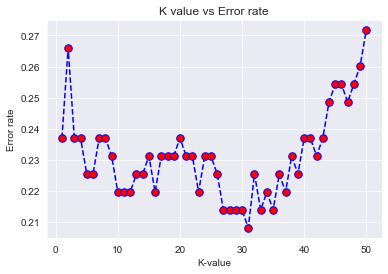

In [786]:
plt.plot(range(1,51), error_rate, color='blue', ls='--', marker='o', markerfacecolor='red', markersize=7.5)
plt.title('K value vs Error rate')
plt.xlabel('K-value')
plt.ylabel('Error rate')

from above curve value of k =31

In [787]:
knn_new=KNeighborsClassifier(n_neighbors=31)

In [788]:
knn_new.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=31, p=2,
                     weights='uniform')

In [789]:
train_prediction=knn_new.predict(x_train)
test_prediction=knn_new.predict(x_test)

## Train data

In [790]:
confusion_matrix(y_train, train_prediction)

array([[398,  39],
       [ 79, 175]], dtype=int64)

In [791]:
print(classification_report(y_train, train_prediction))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       437
           1       0.82      0.69      0.75       254

    accuracy                           0.83       691
   macro avg       0.83      0.80      0.81       691
weighted avg       0.83      0.83      0.83       691



In [792]:
print(f'Test Accuracy :{np.round(accuracy_score(y_train, train_prediction)*100,2)} %')

Test Accuracy :82.92 %


In [793]:
print(f'Jaccard Similarity Score : {np.round(jaccard_similarity_score(y_train, train_prediction),2)}')

Jaccard Similarity Score : 0.83


### Test data

In [794]:
confusion_matrix(y_test, test_prediction)

array([[94,  6],
       [30, 43]], dtype=int64)

In [795]:
print(classification_report(y_test, test_prediction))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       100
           1       0.88      0.59      0.70        73

    accuracy                           0.79       173
   macro avg       0.82      0.76      0.77       173
weighted avg       0.81      0.79      0.78       173



In [796]:
print(f'Jaccard Similarity Score : {np.round(jaccard_similarity_score(y_test, test_prediction),2)}')

Jaccard Similarity Score : 0.79


In [778]:
print(f'Test Accuracy :{np.round(accuracy_score(y_test, test_prediction)*100,2)} %')

Test Accuracy :79.19 %
